# Prophet 

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)

## Import data 

In [3]:
df = pd.read_csv('daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


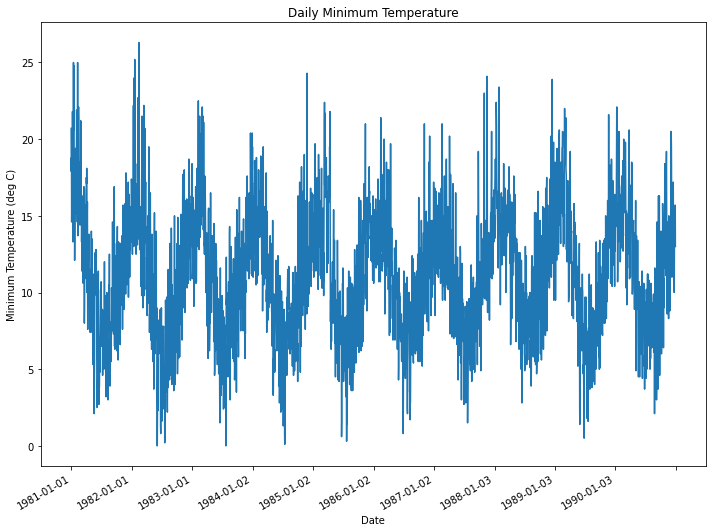

In [5]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()

ax.plot(df.Date, df.Temp)

ax.xaxis.set_major_locator(locator)

ax.set_xlabel('Date')
ax.set_ylabel('Minimum Temperature (deg C)')

ax.set_title("Daily Minimum Temperature")

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## Quick Start 

In [7]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [8]:
# Initialize a model and fit
m = Prophet()
m.fit(df);

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
# Create a dataframe for predictions
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


In [11]:
# Predict the future
forecast = m.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4010,1991-12-27,11.557981,11.154621,17.798276,11.476480,11.640039,2.900757,2.900757,2.900757,-0.019854,-0.019854,-0.019854,2.920611,2.920611,2.920611,0.0,0.0,0.0,14.458738
4011,1991-12-28,11.557970,10.855345,18.054848,11.476202,11.640755,2.919026,2.919026,2.919026,-0.060121,-0.060121,-0.060121,2.979147,2.979147,2.979147,0.0,0.0,0.0,14.476996
4012,1991-12-29,11.557959,10.975359,17.834258,11.475924,11.641487,2.890068,2.890068,2.890068,-0.153079,-0.153079,-0.153079,3.043148,3.043148,3.043148,0.0,0.0,0.0,14.448027
4013,1991-12-30,11.557948,11.284815,17.912355,11.475639,11.642219,3.092186,3.092186,3.092186,-0.019679,-0.019679,-0.019679,3.111865,3.111865,3.111865,0.0,0.0,0.0,14.650134
4014,1991-12-31,11.557937,11.601503,18.290630,11.475330,11.642861,3.262875,3.262875,3.262875,0.078478,0.078478,0.078478,3.184397,3.184397,3.184397,0.0,0.0,0.0,14.820812


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4010,1991-12-27,14.458738,11.154621,17.798276
4011,1991-12-28,14.476996,10.855345,18.054848
4012,1991-12-29,14.448027,10.975359,17.834258
4013,1991-12-30,14.650134,11.284815,17.912355
4014,1991-12-31,14.820812,11.601503,18.290630


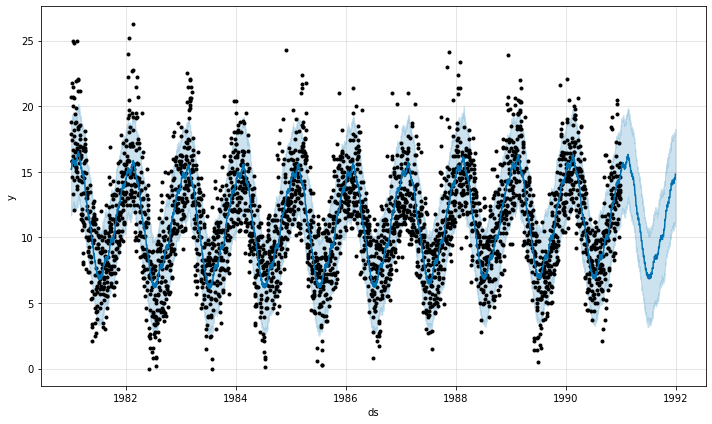

In [14]:
# Plot forecasts
fig1 = m.plot(forecast)

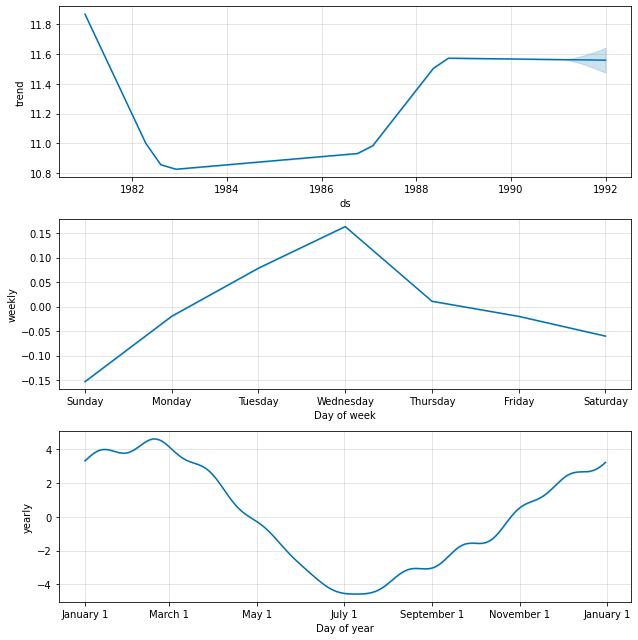

In [15]:
# Plot components
fig2 = m.plot_components(forecast)

## Trend Changepoints 

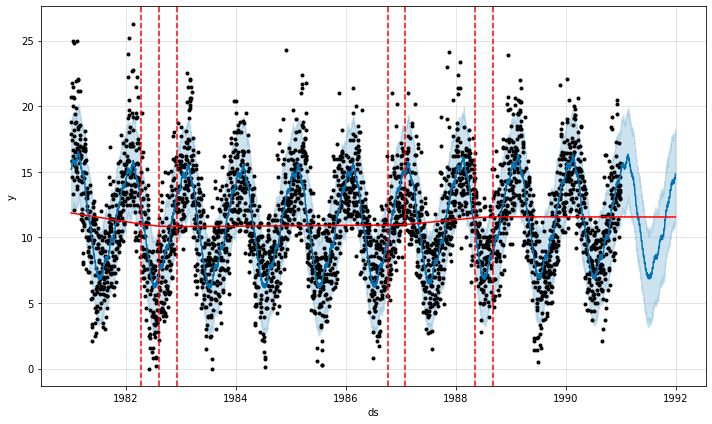

In [16]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## Trend flexibility 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


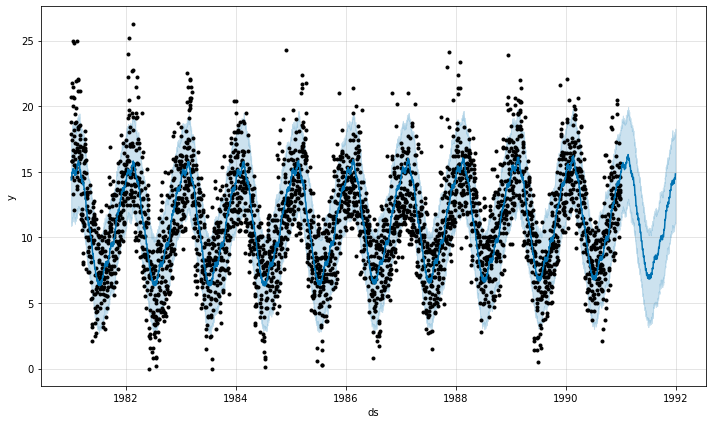

In [19]:
# Default is 0.05
# Increase value will be more flexible
# Decrease value will be less flexible

m = Prophet(changepoint_prior_scale=0.005)

forecast = m.fit(df).predict(future)

fig = m.plot(forecast)

## Visualize seasonality 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


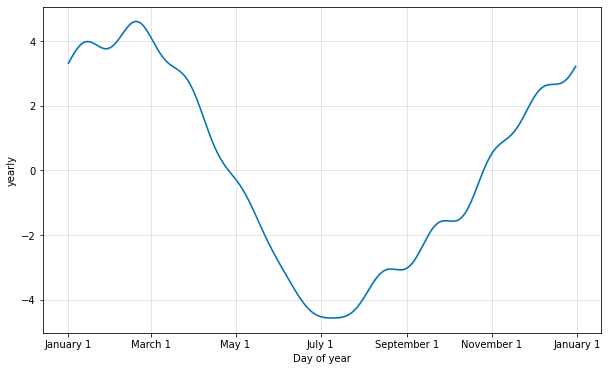

In [20]:
from fbprophet.plot import plot_yearly

m = Prophet().fit(df)
a = plot_yearly(m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


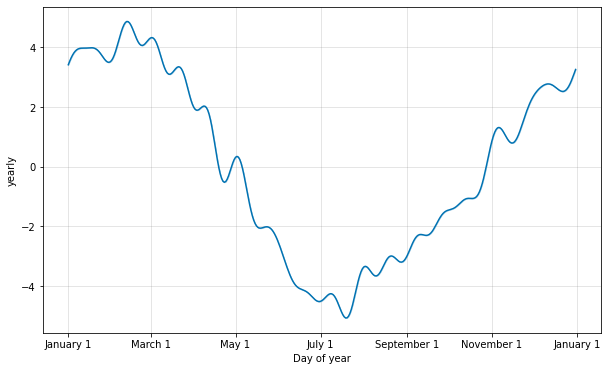

In [22]:
m = Prophet(yearly_seasonality=20).fit(df)
a = plot_yearly(m)

## Uncertainty intervals 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


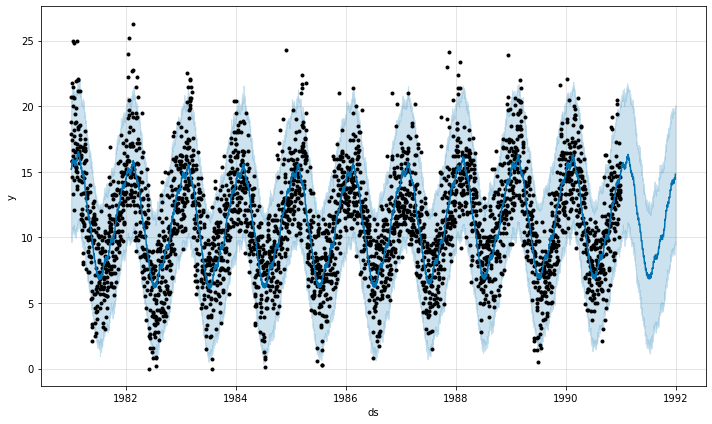

In [23]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

fig = m.plot(forecast)

## Cross-validation and performance metrics

In [24]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')

df_cv.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1983-02-07,16.423922,13.014731,19.778732,20.3,1983-02-06
1,1983-02-08,16.761109,13.293719,20.260829,22.5,1983-02-06
2,1983-02-09,16.951331,13.580595,20.291914,17.2,1983-02-06
3,1983-02-10,16.677249,13.144536,20.122374,15.9,1983-02-06
4,1983-02-11,17.088892,13.617756,20.539912,16.8,1983-02-06


In [25]:
from fbprophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv)
df_perf.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,8.180610,2.860177,2.230460,0.169532,0.784644
1,38 days,8.058296,2.838714,2.214485,0.163477,0.788300
2,39 days,7.849796,2.801749,2.183977,0.159809,0.797319
3,40 days,7.784190,2.790016,2.176305,0.159143,0.797319
4,41 days,7.839969,2.799995,2.184657,0.160652,0.795369


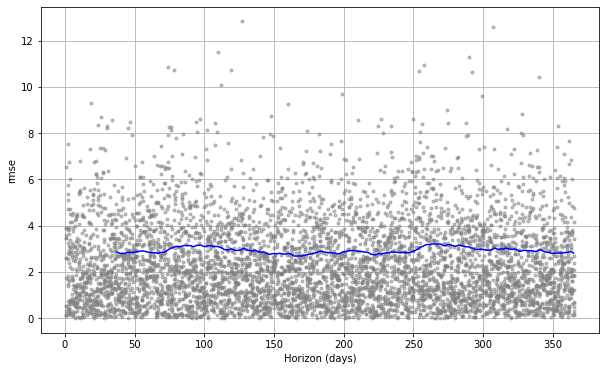

In [31]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')

## Hyperparameter tuning 

In [32]:
from itertools import product
import numpy as np

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

rmses = []

for params in all_params:
    m = Prophet(**params).fit(df)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 15 forecasts with cutoffs between 1983-02-06 00:00:00 and 1989-12-31 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0


    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  2.917632
1                     0.001                     0.10  2.860447
2                     0.001                     1.00  2.890400
3                     0.001                    10.00  2.880997
4                     0.010                     0.01  2.816639
5                     0.010                     0.10  2.832617
6                     0.010                     1.00  2.836759
7                     0.010                    10.00  2.828958
8                     0.100                     0.01  3.461396
9                     0.100                     0.10  2.903203
10                    0.100                     1.00  2.904564
11                    0.100                    10.00  2.901078
12                    0.500                     0.01  6.573144
13                    0.500                     0.10  2.949036
14                    0.500                     1.00  3

In [33]:
best_params = all_params[np.argmin(rmses)]

print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}
